## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
df = pd.read_csv('RegData.csv', header = None)

#### Explore your data

In [3]:
df.head()

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   1       13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


In [5]:
df.rename(columns={ 0:'x' , 1:'y'}, inplace= True)
df

,x,y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [6]:
x = np.array(df['x'])
y = np.array(df['y'])

print(f'x = \n{x}')
print(f'y = \n{y}')     

x = 
[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]
y = 
[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Explore your data

In [8]:
print(f'x shape = {x.shape}')
print(f'y shape = {y.shape}')

x shape = (13,)
y shape = (13,)


In [9]:
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)

In [10]:
print(f'x shape = {x.shape}')
print(f'y shape = {y.shape}')

x shape = (13, 1)
y shape = (13, 1)


#### Plot the original data (scatter plot of X,y)

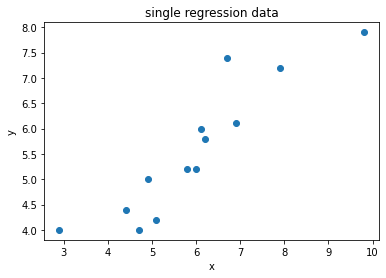

In [11]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("single regression data")
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

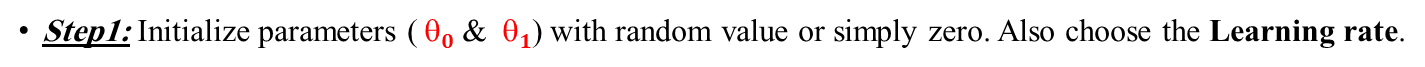

In [13]:
theta0 = theta1 = 0
alpha = 0.001

In [14]:
m = len(x)
epochs = 1000
stopping_cost = 0.0001 

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.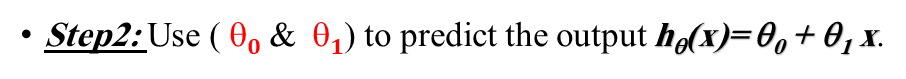
#### Note: you will need to iterate through all data points

In [15]:
hypothesis = theta0 + theta1 * x 
print('hypothesis =\n',hypothesis)

hypothesis =
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).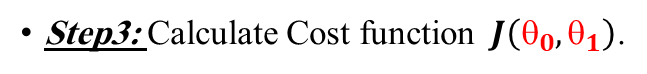
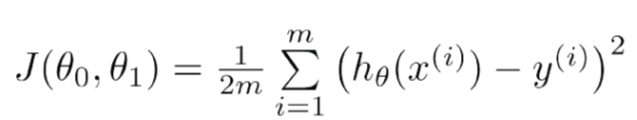

In [16]:
summation = 0
for i in range(m):
    error = hypothesis[i] - y[i]
    summation += error ** 2
J = summation / (2*m)

print(f'cost function = {J[0]}')

cost function = 16.305384479692318


In [17]:
error = hypothesis - y
J = np.sum((error ** 2)) / (2*m)
print(f'cost function = {J}')

cost function = 16.305384479692318


### Step4: Calculate the gradient.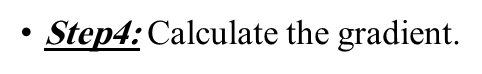
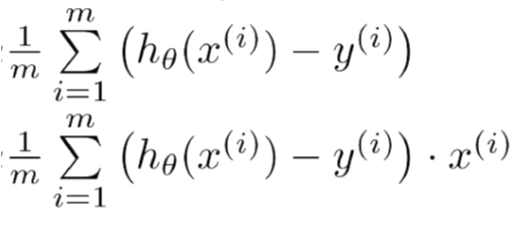

In [ ]:
sum0 = sum1 = 0
for i in range(m):
    sum0 += (hypothesis[i] - y[i])
    sum1 += (hypothesis[i] - y[i])*x[i]

gradient0 = sum0[0] / m
gradient1 = sum1.item() / m

print(f'gradient for theta0 = {gradient0}')
print(f'gradient for theta1 = {gradient1}')

In [16]:
gradient0 = np.sum(error) / m
gradient1 = np.sum((error * x)) / m

print(f'gradient for theta0 = {gradient0}')
print(f'gradient for theta1 = {gradient1}')

gradient for theta0 = -5.56923073976923
gradient for theta1 = -35.043846043215375


### Step5: Update the parameters (simultaneously).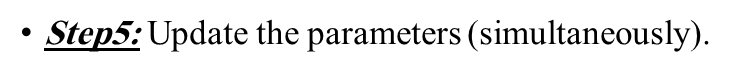
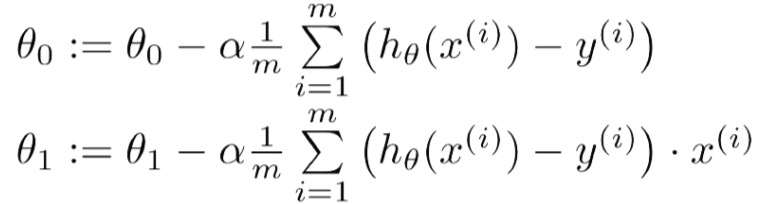

In [17]:
theta0 = theta0 - (alpha * gradient0)
theta1 = theta1 - (alpha * gradient1)

print(f'new theta0 = {theta0}')
print(f'new theta1 = {theta1}')

new theta0 = 0.00556923073976923
new theta1 = 0.03504384604321537


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.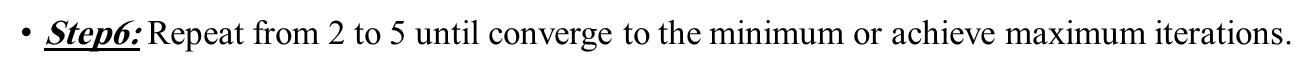

In [19]:
# initalizing lists :
costs = []
hypo = []
theta0_all = []
theta1_all = []

In [ ]:
for i in range(epochs):
    
    summation = sum0 = sum1 = 0
    hypothesis = (theta1 * x) + theta0
    
    for j in range(m):
        
        #calculate summation for cost function
        error = hypothesis[j] - y[j]
        summation += (error ** 2)
        
        #calculate summation for updating the gradient
        sum0 += (hypothesis[j] - y[j])
        sum1 += (hypothesis[j] - y[j])*x[j]

    #calculating the cost function
    J = summation.item() / (2*m)
    
    #calculating the gradient
    gradient0 = sum0.item() / m
    gradient1 = sum1.item() / m
    
    #updating the theta's
    theta0 = theta0 - (alpha * gradient0)
    theta1 = theta1 - (alpha * gradient1)
    
    #saving the costs, theta's ad=nd hypothesis values
    costs.append(J)
    hypo.append(hypothesis)
    theta0_all.append(theta0)
    theta1_all.append(theta1)

    if i > 0:
        if abs(costs[i-1] - costs[i]) <= stopping_cost:
            break
 

In [20]:
for i in range(epochs):
    hypothesis = (theta1 * x) + theta0
    error = hypothesis - y
    J = np.sum(error ** 2) / (2*m)
    
    gradient0 = np.sum(error) / m
    gradient1 = np.sum((error * x)) / m
    
    theta0 = theta0 - (alpha * gradient0)
    theta1 = theta1 - (alpha * gradient1)
    
    hypo.append(hypothesis)
    costs.append(J)
    theta0_all.append(theta0)
    theta1_all.append(theta1)
    
    if (i > 0):
        if abs(costs[i-1] - costs[i]) <= stopping_cost:
            break

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [21]:
theta1

0.8881463897205402

In [22]:
theta0

0.14999608421692023

In [23]:
y_predicted = theta0 + (theta1 * x)  
print(f'h0(x) = {y_predicted}')

h0(x) = [[2.7256207 ]
 [6.10057673]
 [4.50191348]
 [7.16635265]
 [8.85383087]
 [6.27820626]
 [5.56768898]
 [5.65650353]
 [5.47887442]
 [4.67954259]
 [4.32428395]
 [4.05784028]
 [5.30124531]]


### helping methods for plotting

In [39]:
def draw_fit_line(x,y,y_pred):
    plt.plot(x, y_pred, 'r-')
    plt.scatter(x,y)
    plt.xlabel('x data')
    plt.ylabel('y predicted')
    plt.show()
    
def draw_loss_line(x, y, xlabel, ylabel):
    plt.plot(x, y, 'g')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def plot_all_hupothesis(x,y,hypo):
    plt.scatter(x,y)
    plt.xlabel('x data')
    plt.ylabel('all hypothesis')
    for i in range(len(hypo)):
        plt.plot(x, hypo[i])
    plt.show()

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

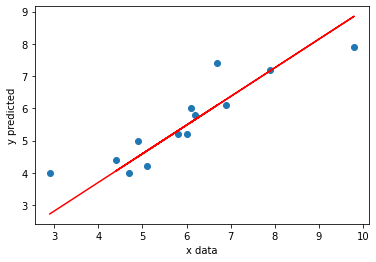

In [26]:
draw_fit_line(x,y, y_predicted)

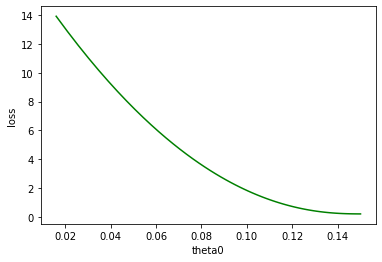

In [27]:
draw_loss_line(theta0_all,costs, 'theta0', 'loss')

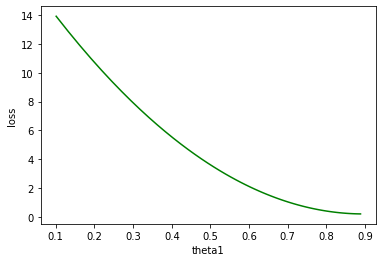

In [28]:
draw_loss_line(theta1_all,costs, 'theta1', 'loss')

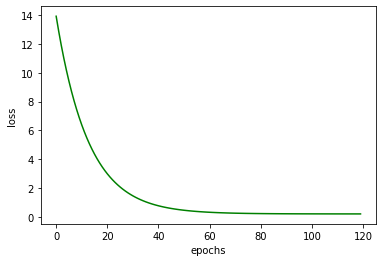

In [29]:
epochs_list = list(range(len(costs)))
draw_loss_line(epochs_list,costs, 'epochs', 'loss')

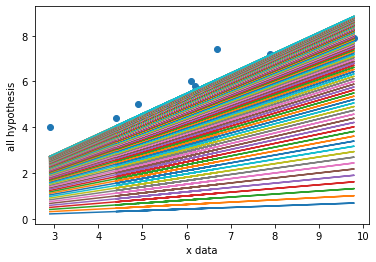

In [30]:
plot_all_hupothesis(x,y,hypo)

#### Use R2 score to evaluate LR equation output
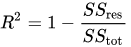
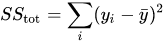
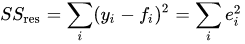
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [24]:
# MSE
mse = np.square(np.subtract(y,y_predicted)).mean()
print('mse = ', mse)

#R2 SCORE
print(f'r2 score = {r2_score(y, y_predicted)}')

mse =  0.40392439794742646
r2 score = 0.7466665893916266


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [25]:
x0 = np.ones(x.shape[0])
x = np.insert(x, 0, x0, axis=1)
print(x)

[[1.         2.9000001 ]
 [1.         6.69999981]
 [1.         4.9000001 ]
 [1.         7.9000001 ]
 [1.         9.80000019]
 [1.         6.9000001 ]
 [1.         6.0999999 ]
 [1.         6.19999981]
 [1.         6.        ]
 [1.         5.0999999 ]
 [1.         4.69999981]
 [1.         4.4000001 ]
 [1.         5.80000019]]


In [26]:
print(x.shape)

(13, 2)


In [27]:
alpha = 0.001
epochs = 1000
stopping_cost = 0.0001 

In [28]:
def batch_gradient_descent(x, y, alpha, numIterations):
    
    m = x.shape[0] 
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
#     print(f'x shape = {x.shape}')
#     print(f'theta shape = {theta.shape}')
    all_cost, all_hypothesis, all_theta0, all_theta1 = [], [], [], []
    
    for i in range(numIterations):
        hypothesis = x @ theta 
        error = hypothesis - y
        J = (error.T @ error) ** 2 / (2 * m)
        gradient = (x.T @ error) / m
        theta = theta - alpha * gradient
        
        all_hypothesis.append(hypothesis)
        all_cost.append(J.item())
        all_theta0.append(theta[0].item())
        all_theta1.append(theta[1].item())
        
        if (i > 0) and (abs(all_cost[i - 1] - all_cost[i]) <= stopping_cost):
            break
        
    return theta, all_cost, all_hypothesis, all_theta0, all_theta1


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [32]:
theta, allCost, allHypo ,allTheta0, allTheta1 = batch_gradient_descent(x,y,alpha,epochs)

In [33]:
x.shape

(13, 2)

In [34]:
theta.shape

(2, 1)

In [35]:
y_predicted = theta[0] * x[:,0] + theta[1] * x[:,1]
# y_hat = x @ theta
print('y predicted = ',y_predicted)
print('actual y = ',y)

y predicted =  [2.74646899 6.14156873 4.53336372 7.21370582 8.91125591 6.32025846
 5.60550039 5.69484504 5.51615574 4.71205303 4.35467399 4.08664004
 5.33746644]
actual y =  [[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]


In [36]:
# MSE
mse = np.square(np.subtract(y,y_predicted)).mean()
print('mse = ', mse)

# R score
print(f'r2 score = {r2_score(y, y_predicted)}')

mse =  3.77041110478232
r2 score = 0.7483653984423915


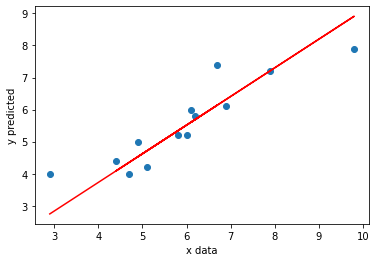

In [40]:
draw_fit_line(x[:,-1],y,y_predicted)

## Plot loss function


### Plot loss vs. iterations

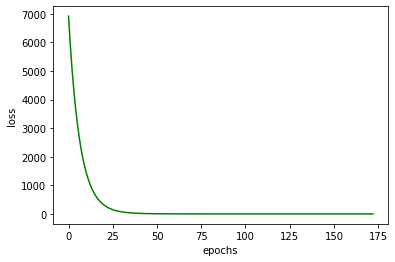

In [46]:
epoch_list = list(range(len(allCost)))
draw_loss_line(epoch_list,allCost, 'epochs','loss')

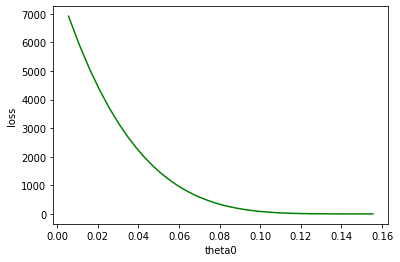

In [47]:
draw_loss_line(allTheta0,allCost, 'theta0', 'loss')

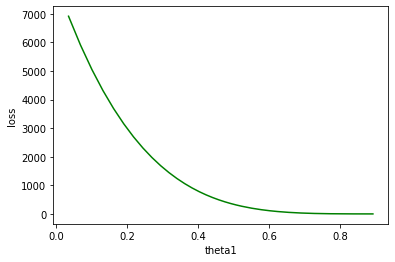

In [48]:
draw_loss_line(allTheta1,allCost, 'theta1', 'loss')

In [49]:
x.shape

(13, 2)

In [50]:
y.shape

(13, 1)

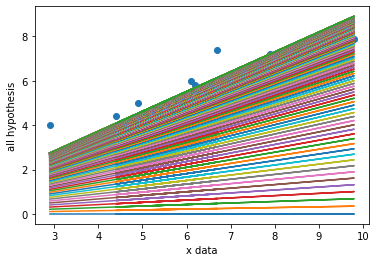

In [51]:
plot_all_hupothesis(x[:, 1],y,allHypo)

## ------------------------------------------------------------------------------------------------------
## Multivariate LR
## ------------------------------------------------------------------------------------------------------

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [41]:
df = pd.read_csv('MultipleLR.csv', header = None)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       25 non-null     int64
 1   1       25 non-null     int64
 2   2       25 non-null     int64
 3   3       25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [43]:
df.rename(columns={ 0:'x1' , 1:'x2', 2:'x3', 3:'y'}, inplace= True)
df

,x1,x2,x3,y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [44]:
# we need to normalize the data 
df=(df - df.mean())/df.std() 
df

,x1,x2,x3,y
0,-0.491870,0.041588,-0.550763,-0.417564
1,1.136839,0.681397,0.979135,0.954908
2,0.811098,0.921325,0.724152,0.746958
3,1.381146,1.481158,1.574096,1.412399
4,-0.491870,-1.078078,-0.975735,-0.833465
5,-2.120580,-2.677600,-2.250651,-2.538658
6,-0.817612,-0.438269,-0.380775,-0.542335
7,-2.609193,-1.877839,-1.825679,-1.956397
8,0.648227,-0.038389,0.724152,0.539007
9,-0.003257,-0.758174,0.554163,0.081517


In [45]:
x_data = df.iloc[:,:3]
x_data

,x1,x2,x3
0,-0.491870,0.041588,-0.550763
1,1.136839,0.681397,0.979135
2,0.811098,0.921325,0.724152
3,1.381146,1.481158,1.574096
4,-0.491870,-1.078078,-0.975735
5,-2.120580,-2.677600,-2.250651
6,-0.817612,-0.438269,-0.380775
7,-2.609193,-1.877839,-1.825679
8,0.648227,-0.038389,0.724152
9,-0.003257,-0.758174,0.554163


In [46]:
x_data.insert(0, 'x0', 1)
x_data

,x0,x1,x2,x3
0,1,-0.491870,0.041588,-0.550763
1,1,1.136839,0.681397,0.979135
2,1,0.811098,0.921325,0.724152
3,1,1.381146,1.481158,1.574096
4,1,-0.491870,-1.078078,-0.975735
5,1,-2.120580,-2.677600,-2.250651
6,1,-0.817612,-0.438269,-0.380775
7,1,-2.609193,-1.877839,-1.825679
8,1,0.648227,-0.038389,0.724152
9,1,-0.003257,-0.758174,0.554163


#### another way using numpy arrays

In [57]:
#convert it to numpy array
x = np.array(x_data)
#add the x0 vector to the data
x = np.vstack([np.ones((x.shape[0])),x.T])


NameError: name 'x_data' is not defined

In [48]:
x = np.array(x_data)
y = np.array(df['y'])

In [49]:
print(f'x shape = {x.shape}')
print(f'y shape = {y.shape}')

x shape = (25, 4)
y shape = (25,)


In [50]:
y = y.reshape(25,1)

In [51]:
print(f'x shape = {x.shape}')
print(f'y shape = {y.shape}')

x shape = (25, 4)
y shape = (25, 1)


### Repeat your implementation but for more than one variable

In [52]:
# we will call the same vectorize function as nothing will change except for data 
#and we don't need for the other plotting list as dim increses

def batch_gradient_descent2(x, y, alpha, numIterations):
    
    m = x.shape[0] 
    n = x.shape[1]
    
    theta = np.zeros((n, 1))
    
    all_cost =  []
    
    for i in range(0, numIterations):
        hypothesis = x @ theta
        error = hypothesis - y
        J = (error.T @ error) * 2 / (2 * m)
        gradient = (x.T @ error) / m
        theta = theta - alpha * gradient
              
        all_cost.append(J.item())
      
        if (i > 0) and (abs(all_cost[i - 1] - all_cost[i]) <= stopping_cost):
            break
        
    return theta, all_cost


In [53]:
theta, Costs = batch_gradient_descent2(x,y,alpha,epochs)

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [54]:
h = x @ theta
h

array([[-0.30366351],
       [ 0.83056248],
       [ 0.7243767 ],
       [ 1.31577387],
       [-0.75571965],
       [-2.082691  ],
       [-0.48090677],
       [-1.86296289],
       [ 0.4043306 ],
       [-0.04229069],
       [-0.67879438],
       [-0.74222828],
       [ 0.93631531],
       [-0.21576742],
       [-0.45336439],
       [ 0.93349004],
       [-0.48668555],
       [ 0.59334713],
       [ 0.61665083],
       [-0.06418252],
       [ 0.44574598],
       [ 0.42227636],
       [ 0.14964012],
       [-0.27166674],
       [ 1.06841436]])

In [55]:
print('y predicted = \n',h)
print('-------------------------------------------------------------------------------')
print('actual y = \n',y)

y predicted = 
 [[-0.30366351]
 [ 0.83056248]
 [ 0.7243767 ]
 [ 1.31577387]
 [-0.75571965]
 [-2.082691  ]
 [-0.48090677]
 [-1.86296289]
 [ 0.4043306 ]
 [-0.04229069]
 [-0.67879438]
 [-0.74222828]
 [ 0.93631531]
 [-0.21576742]
 [-0.45336439]
 [ 0.93349004]
 [-0.48668555]
 [ 0.59334713]
 [ 0.61665083]
 [-0.06418252]
 [ 0.44574598]
 [ 0.42227636]
 [ 0.14964012]
 [-0.27166674]
 [ 1.06841436]]
-------------------------------------------------------------------------------
actual y = 
 [[-0.4175644 ]
 [ 0.95490823]
 [ 0.74695783]
 [ 1.4123991 ]
 [-0.83346519]
 [-2.53865846]
 [-0.54233464]
 [-1.95639734]
 [ 0.53900743]
 [ 0.08151656]
 [-0.87505527]
 [-0.87505527]
 [ 0.91331815]
 [-0.4175644 ]
 [-0.58392472]
 [ 1.24603878]
 [-0.6255148 ]
 [ 0.87172807]
 [ 0.62218759]
 [-0.12643384]
 [ 0.62218759]
 [ 0.53900743]
 [ 0.53900743]
 [-0.54233464]
 [ 1.24603878]]


In [68]:
y.shape

(25, 1)

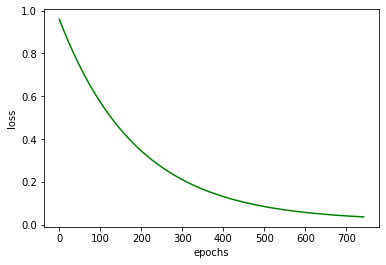

In [69]:
epoch_list = list(range(len(Costs)))
draw_loss_line(epoch_list,Costs, 'epochs','loss')

#### Use R2 score to evaluate LR equation output

In [56]:
# R score
print(f'r2 score = {r2_score(y, h)}')

r2 score = 0.961991735730893


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [71]:
from sklearn import linear_model 

In [72]:
reg = linear_model.LinearRegression()  

#### Train the model (fit the model to the training data)

In [73]:
reg.fit(x, y)

LinearRegression()

#### Predict y values using the trained model

In [74]:
y_pred=reg.predict(x)

#### Use R2 score to evaluate model output

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2 = r2_score(y, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9896615789448399


In [77]:
#another way
r_sq = reg.score(x, y)
print(f'R2 Score = {r_sq}')

R2 Score = 0.9896615789448399


### Repeat for Mulivariate

In [78]:
# it is the same just change the data
from sklearn import linear_model 
regr = linear_model.LinearRegression()  
regr.fit(x, y)
y_pred=regr.predict(x)
r_sq = regr.score(x, y)
print(f'R2 Score = {r_sq}')

R2 Score = 0.9896615789448399
